# Homework 4

In [1]:
!pip install -U yellowbrick
# import necessary packages
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings("ignore")

# reading csv data files
dfVoice = read_csv("voice.csv")
dfCustomers = read_csv("Mall_Customers.csv")

# data prep
arrayVoice = dfVoice.values
dataVoice = arrayVoice[:,:-1]
targetVoice = arrayVoice[:,-1]

dfCustomers = dfCustomers.drop(['Gender', 'CustomerID'], axis=1)
dfCustomers.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)

## Problem 1

### (a-d)

In [2]:
# create LabelEncoder and impose on targetVoice
le = LabelEncoder()
targetVoice = le.fit_transform(targetVoice)

# scaling data and train/test split
scaler = StandardScaler()
dataVoice = scaler.fit_transform(dataVoice)
XTrain, XTest, YTrain, YTest = train_test_split(dataVoice, targetVoice, test_size=0.2, random_state=1)

# SVM accuracy
sVM = SVC()
results = cross_val_score(sVM, dataVoice, targetVoice, scoring='accuracy')
print("SVM Default: %.3f" % results.mean())

# SVM w/ parameters accuracy
kernelNames = []
totalResults = []
svmKernels = []
svmKernels.append(("Linear", 'linear'))
svmKernels.append(("RBF", 'rbf')) # This should be the same as default
svmKernels.append(("Polynomial", 'poly'))
for name, parameter in svmKernels:
    sVM = SVC(kernel=parameter)
    results = cross_val_score(sVM, dataVoice, targetVoice, scoring='accuracy')
    kernelNames.append(name)
    totalResults.append(results)
    print("%s: %.3f" % (name, results.mean()))

SVM Default: 0.967
Linear: 0.967
RBF: 0.967
Polynomial: 0.939


### (e)

In [3]:
# kFold with linear kernel
kFold = KFold(n_splits=10, random_state=13, shuffle=True)
sVM = SVC(kernel='linear')

# finding best C using GridSearch
C = [i for i in range(1,27)]
grid = dict(C=C)
gridSearch = GridSearchCV(sVM, grid, scoring='accuracy', cv=kFold, n_jobs=1)
results = gridSearch.fit(XTrain,YTrain)
print('Optimal: %s' % results.best_params_)
print('Accuracy: %.3f' % results.best_score_)

Optimal: {'C': 1}
Accuracy: 0.976


### (f)

In [4]:
# kFold with rbf kernel (default)
sVM = SVC()

# finding best γ using GridSearch
gamma = [0.0001, 0.001, 0.01, 0.1]
grid = dict(gamma=gamma)
gridSearch = GridSearchCV(sVM, grid, scoring='accuracy', cv=kFold, n_jobs=1)
results = gridSearch.fit(XTrain,YTrain)
print('Optimal: %s' % results.best_params_)
print('Accuracy: %.3f' % results.best_score_)

Optimal: {'gamma': 0.1}
Accuracy: 0.980


## Problem 2

### (a)

In [5]:
# creating KMeans clusters
clusters = []
for i in range(1,16):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(dfCustomers)
    clusters.append(km.inertia_)   
print(clusters)

[308812.77999999997, 212840.16982097185, 143342.751571706, 104366.151455562, 75378.76464074482, 58302.406308603684, 51118.94993164731, 44312.46881207721, 40894.98978213979, 37468.51571576571, 34174.55217264217, 32433.693443034437, 29426.047295297296, 28300.520737486917, 26398.282683982678]


### (b)

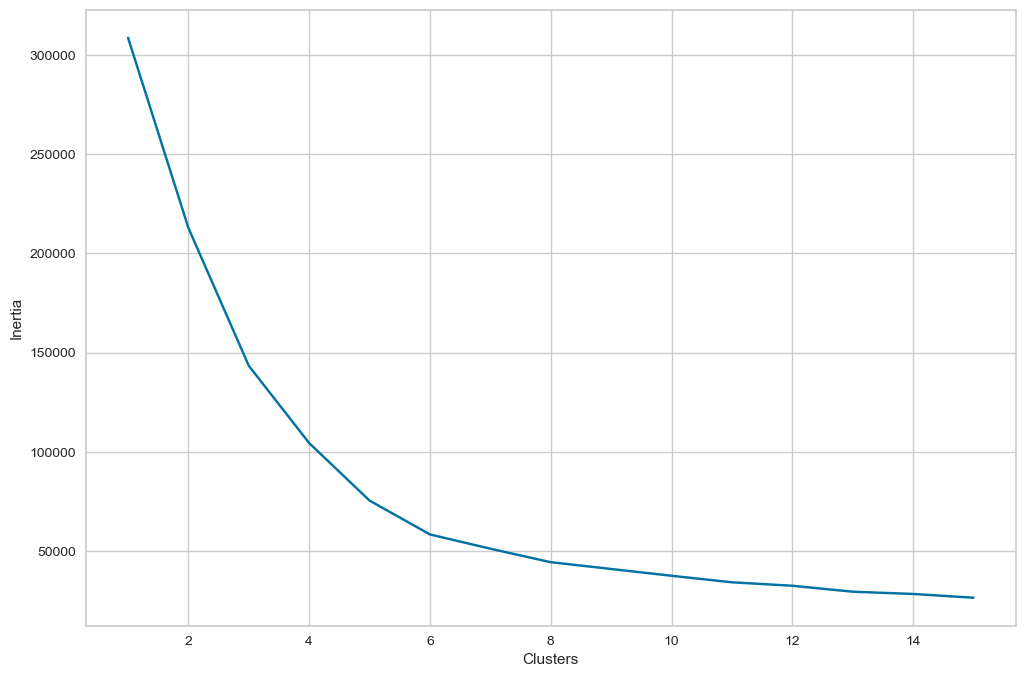

In [6]:
# creating plot to find elbows
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,16)), y=clusters, ax=ax)
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

> From the plot above, we can see a more significant change in inertia happen with clusters 3 and 5, and potentially 6.

### (c)

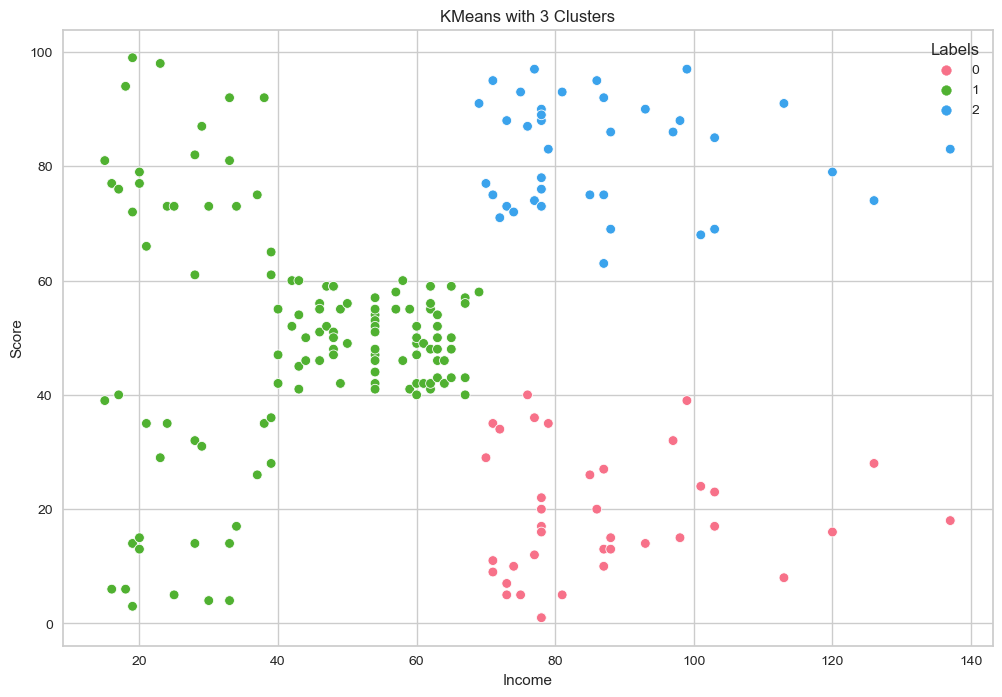

In [7]:
# reporting for 3 clusters
kmCluster3 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(dfCustomers)
dfCustomers['Labels'] = kmCluster3.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x=dfCustomers['Income'], y=dfCustomers['Score'], hue=dfCustomers['Labels'], palette=sns.color_palette('husl',3))
plt.title('KMeans with 3 Clusters')
plt.show()

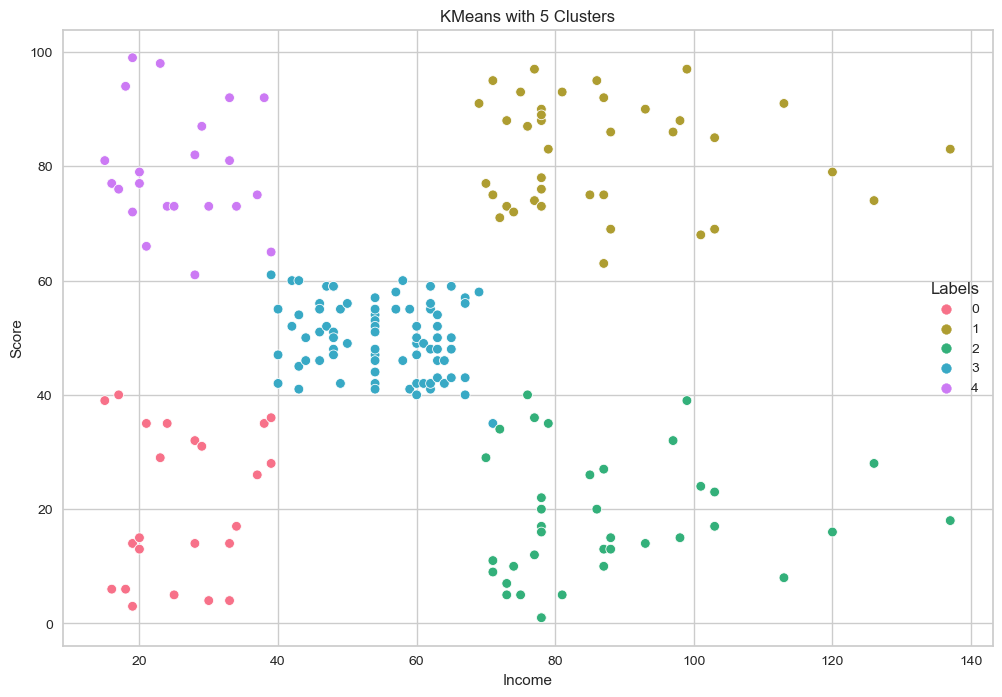

In [8]:
# reporting for 5 clusters
kmCluster5 = KMeans(n_clusters=5, init='k-means++', random_state=42).fit(dfCustomers)
dfCustomers['Labels'] = kmCluster5.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x=dfCustomers['Income'], y=dfCustomers['Score'], hue=dfCustomers['Labels'], palette=sns.color_palette('husl',5))
plt.title('KMeans with 5 Clusters')
plt.show()

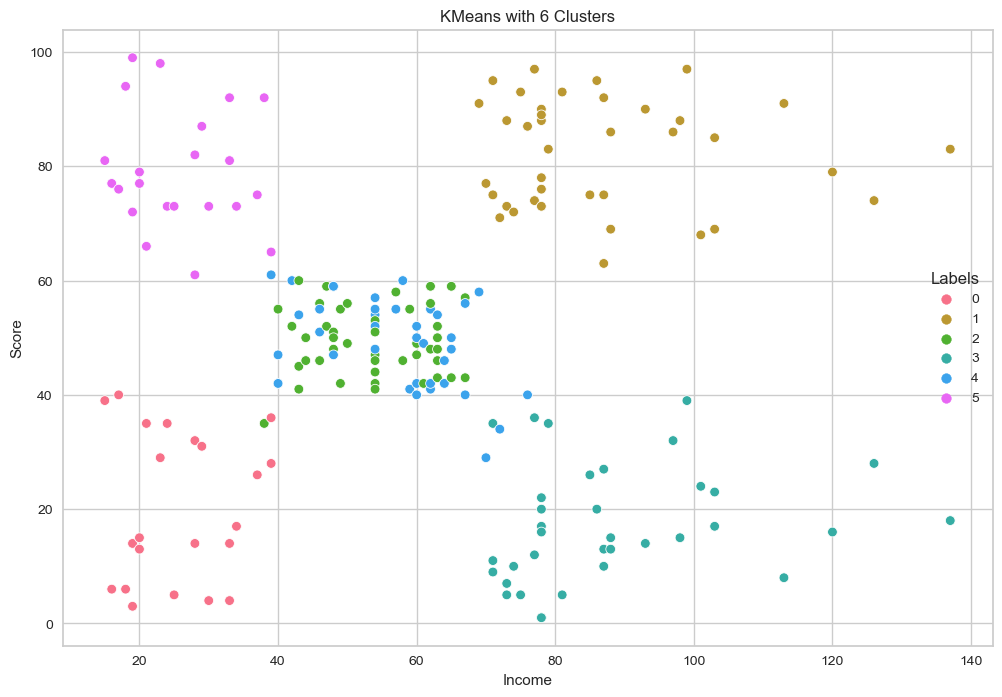

In [9]:
# reporting for 6 clusters
kmCluster6 = KMeans(n_clusters=6, init='k-means++', random_state=42).fit(dfCustomers)
dfCustomers['Labels'] = kmCluster6.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x=dfCustomers['Income'], y=dfCustomers['Score'], hue=dfCustomers['Labels'], palette=sns.color_palette('husl',6))
plt.title('KMeans with 6 Clusters')
plt.show()

> Based off the three plots above, you can clearly see that 5 clusters better suits the data compared to 3 or 6 clusters.

### (d)

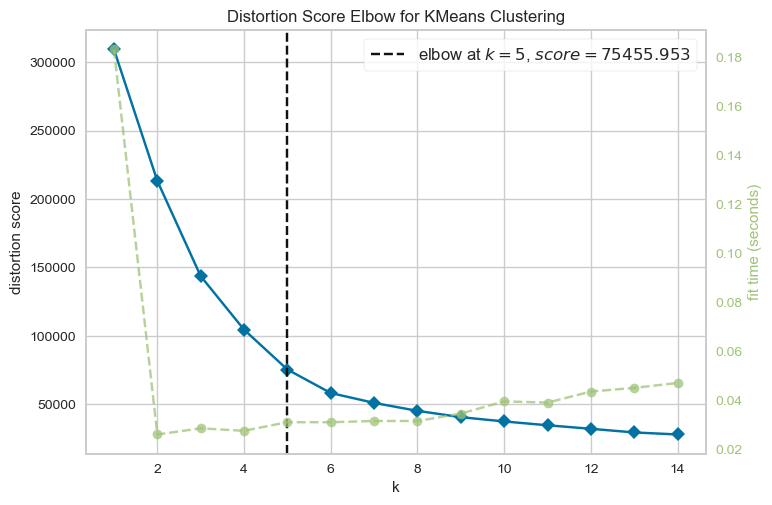

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# KElbowVisualizer
km = KMeans()
kev = KElbowVisualizer(km, k=(1,15)).fit(dfCustomers)
kev.show()

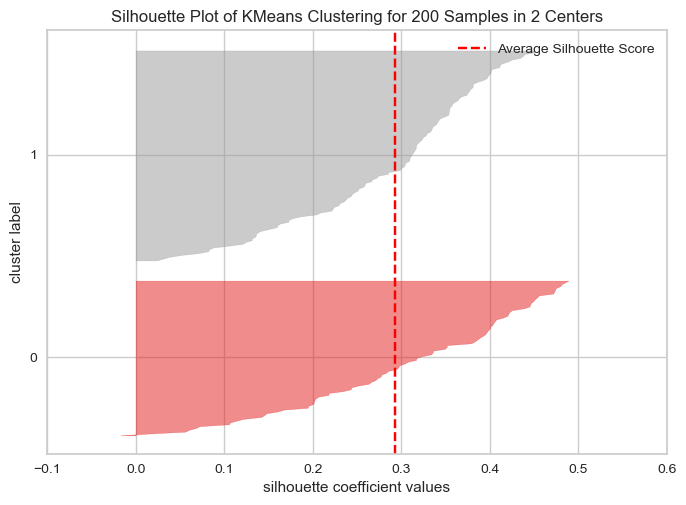

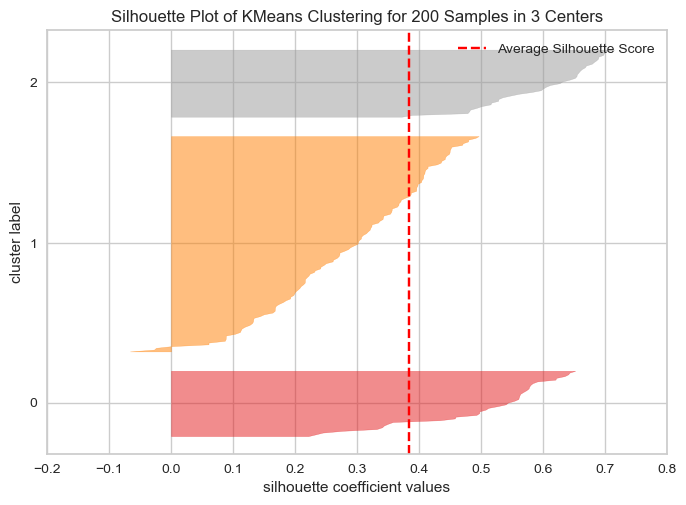

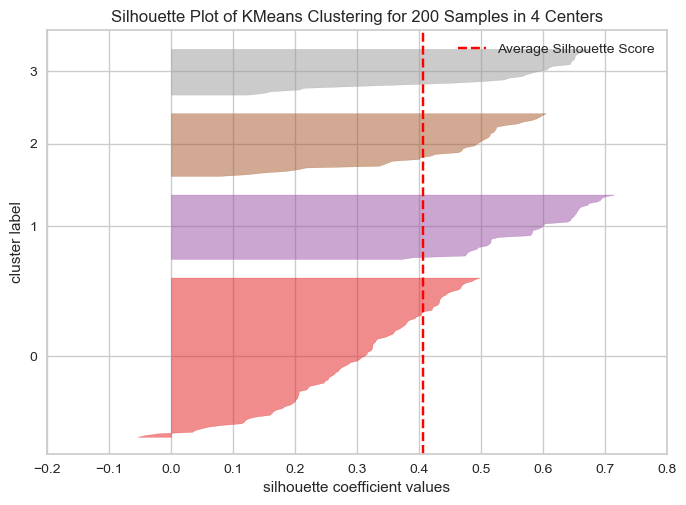

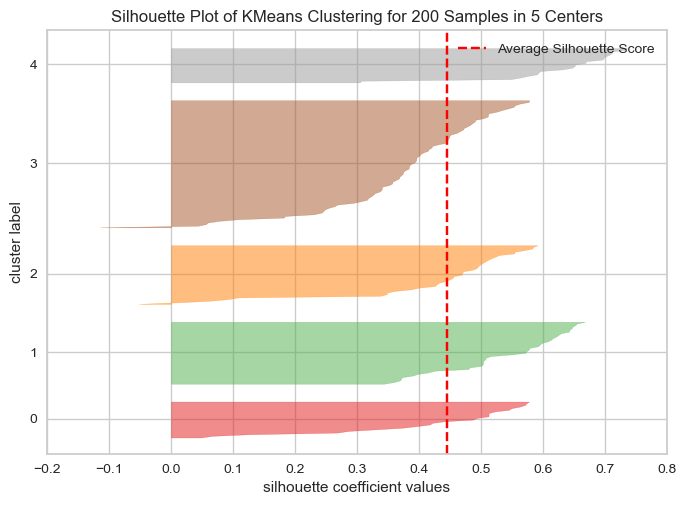

In [11]:
# recreating KMean clusters
kmCluster2 = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(dfCustomers)
kmCluster3 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(dfCustomers)
kmCluster4 = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(dfCustomers)
kmCluster5 = KMeans(n_clusters=5, init='k-means++', random_state=42).fit(dfCustomers)

# SilhouetteVisualizer
models = [kmCluster2, kmCluster3, kmCluster4, kmCluster5]
for model in models:
    sv = SilhouetteVisualizer(model).fit(dfCustomers)
    sv.show()

### (e)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 1 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


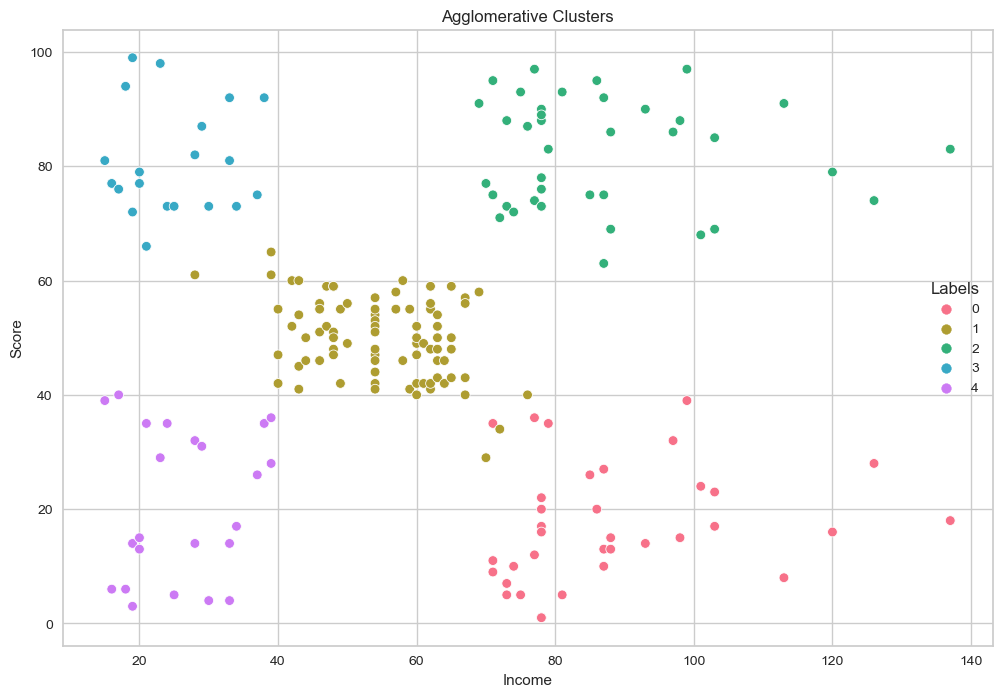

In [12]:
# AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5, linkage='average', compute_full_tree=True).fit(dfCustomers)
print(ac.labels_)

# Plotting clusters
dfCustomers['Labels'] = ac.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x=dfCustomers['Income'], y=dfCustomers['Score'], hue=dfCustomers['Labels'], palette=sns.color_palette('husl',5))
plt.title('Agglomerative Clusters')
plt.show()

### (f)

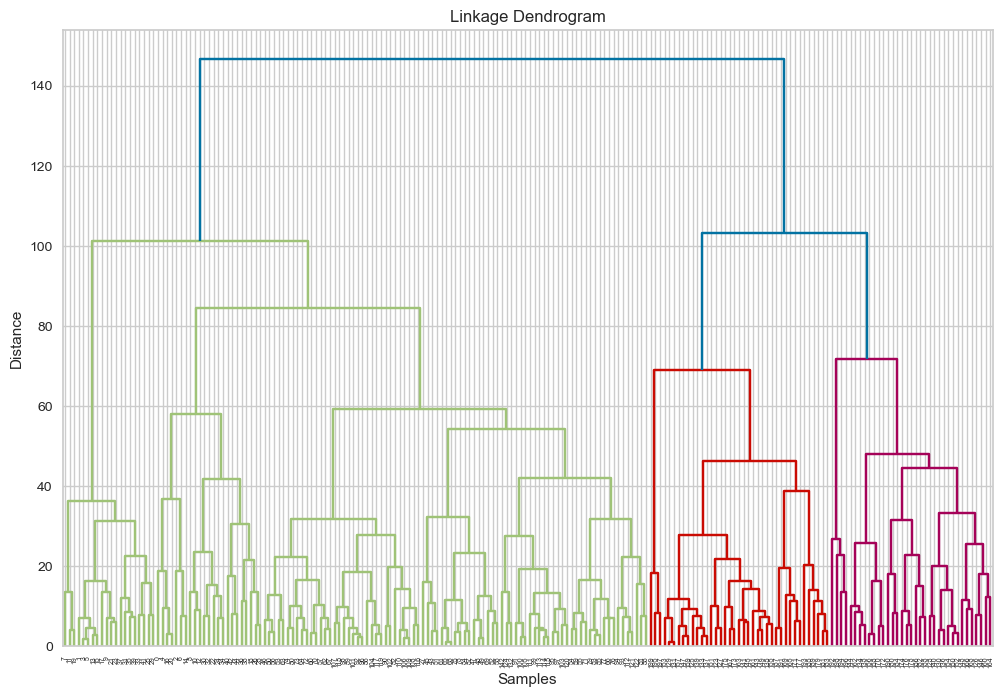

In [13]:
# creating clusters with linkage and plotting dendrogram
links = linkage(dfCustomers, method='complete', metric='euclidean')
plt.figure(figsize=(12,8))
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Linkage Dendrogram')
dendrogram(links)
plt.show()

### (g)

In [14]:
# cut tree (Transposed for readability)
print(cut_tree(links,n_clusters=3).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1
  2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
  2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]]
